In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


In [3]:
file_path = "E-commerce Customer Behavior - Sheet1 (1).csv"  # Replace with your dataset file
data = pd.read_csv(file_path)

print("\nDataset Preview:")
print(data.head())



Dataset Preview:
   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied 

C:\Users\ML\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ML\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ML\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ML\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

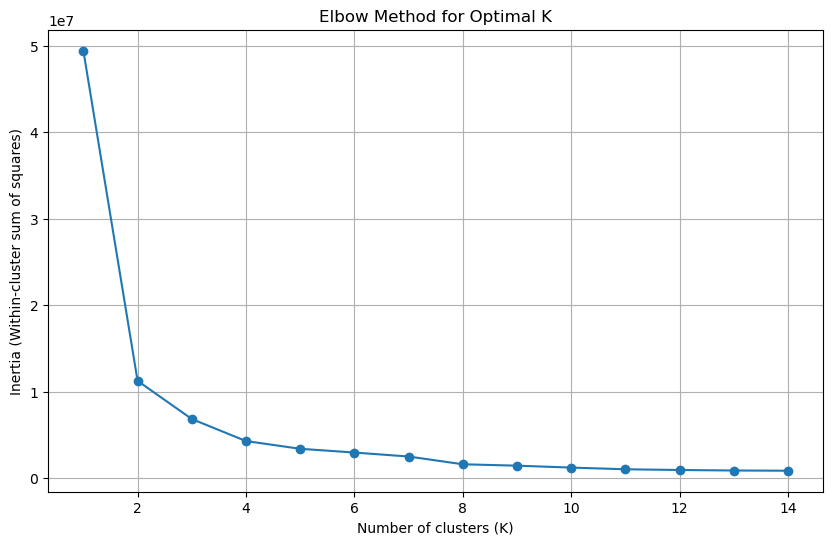

In [5]:
label_encoder = LabelEncoder()

categorical_cols = ['Gender', 'City', 'Membership Type', 'Satisfaction Level']
for col in categorical_cols:
    data[f'{col}_encoded'] = label_encoder.fit_transform(data[col])

data = data.drop(columns=categorical_cols)

inertias = []
K_range = range(1, 15)  # Testing K values from 1 to 15

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.grid(True)
plt.show()


In [ ]:
optimal_k = 4  # Change this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data)

# Cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

data['Cluster'] = labels

plt.figure(figsize=(12, 6))
plt.scatter(data['Total Spend'], data['Items Purchased'], c=labels, cmap='viridis', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-means Clustering with K={optimal_k}')
plt.xlabel('Total Spend')
plt.ylabel('Items Purchased')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------
# 7. OPTIONAL: DISPLAY CLUSTER MEANS
# -------------------------------------------
cluster_means = data.groupby('Cluster').mean()
print("\nCluster Means:")
print(cluster_means)
